# The Centroid Method
#### Implementing the basic midpoint centroid classifier

The centroid method is a great way to explain classification for anyone new to machine learning. 
This notebook will take you through a simple example. 

Let's say you're trying to predict whether you will pass or fail an upcoming exam. Suppose you've talked to past students and have gathered the following information from each student.
  
  1) # of hours spent reading the textbook
  
  2) # of hours spent practicing problems
  
  3) Whether or not that student passed his/her exam.
  



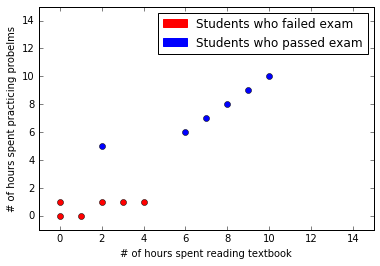

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

hours_read_failed = np.array([0, 1, 2, 3, 4, 0]) # data pts for students who failed
hours_practiced_failed = np.array([0, 0, 1, 1, 1, 1])

hours_read_passed = np.array([6, 7, 8, 9, 10, 2, ]) # data pts for students who passed
hours_practiced_passed = np.array([6, 7, 8, 9, 10, 5])

def plotData():
    plt.plot(hours_read_failed, hours_practiced_failed, 'ro')
    plt.plot(hours_read_passed, hours_practiced_passed, 'bo')
    plt.axis([-1, 15, -1, 15])
    
def plotLegend():
    plt.xlabel("# of hours spent reading textbook")
    plt.ylabel("# of hours spent practicing probelms")
    failed_students = mpatches.Patch(color='red', label='Students who failed exam')
    passed_students = mpatches.Patch(color='blue', label='Students who passed exam')
    plt.legend(handles=[failed_students, passed_students])
    
plotData()
plotLegend()
plt.show()

Let's say we wanted to find the hours spent by the average student who failed and passed their exam. In the graph below, this is indicated by the red and blue asterisk *. 

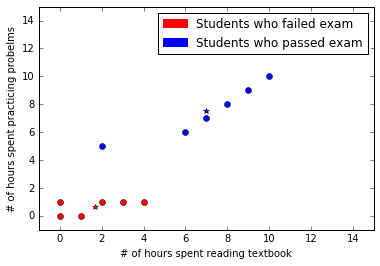

In [2]:
avg_failed = np.mean(hours_read_failed), np.mean(hours_practiced_failed)
avg_passed = np.mean(hours_read_passed), np.mean(hours_practiced_passed)

def plotAvgPts():
    plt.plot(avg_failed[0], avg_failed[1], 'r*')
    plt.plot(avg_passed[0], avg_passed[1], 'b*')

plotData()
plotLegend()
plotAvgPts()
plt.show()

Let's only focus on the average failed/passed student for now. 

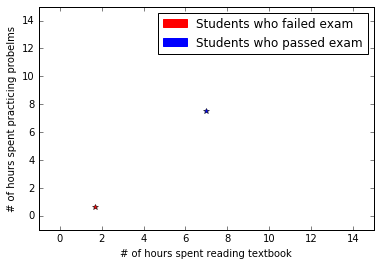

In [3]:
plotAvgPts()
plt.axis([-1, 15, -1, 15])
plotLegend()
plt.show()

Let's draw the vector between these two points. 
Let u_f be the average failed student point. 
Let u_p be the average passed student point. 
To get the vector between these two points, we can subtract them

u_f - u_p = vector
u_f = vector + u_p  # intuitively, this means start from the passed pt, add on the difference vector, and you'll reach the failed pt. 

We call the vector between our two avg points, w.  This will essentially be our 'weight' vector that will be normal to our hyperplane/decision boundary. 

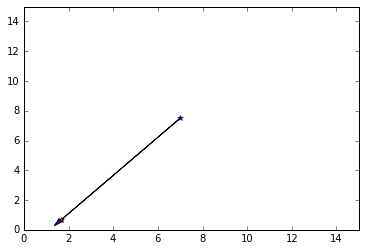

In [4]:

def plotNormalVector():
    plt.arrow(avg_passed[0], avg_passed[1], avg_failed[0] - avg_passed[0], avg_failed[1] - avg_passed[1], head_width=0.25, head_length=0.5)

plotAvgPts()
plt.axis([0, 15, 0, 15])
plotNormalVector()
plt.show()

Our hyperplane will be at the midpoint of our averaged points. We can find the midpoint by adding them and dividing by two. 

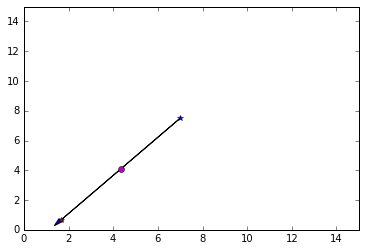

In [5]:
midpoint = (np.array(avg_failed) + np.array(avg_passed)) / 2

def plotMidpoint():
    plt.plot(midpoint[0], midpoint[1], 'mo')

plotAvgPts()
plotMidpoint()
plt.axis([0, 15, 0, 15])
plotNormalVector()
plt.show()


We know that our hyperplane will be orthogonal to this normal vector and will bisect our w vector through the midpoint. 

Enter the following into Wolfram Alpha and see the results for yourself.
*  y - 4.08333333333=(-1 / 1.28125) * ( x - 4.33333333333), y = 1.28125*x+-1.46875  

*  Formula for finding the orthogonal line,
    y - midpoint.y = (-1 / m) * (x - midpoint.x)

###  The hyperplane orthogonally bisects our normal vector at the midpoint.  
![Hyperplane bisecting normal vector at midpoint.](ortho.gif "Hyperplane")

## Deriving the Decision Function

Now that we have our hyperplane (blue line above), we will use this as our decision boundary for classification.  Any point below our hyperplane will be in one class (students that failed exam), any point above our blue line will be in another class (students that passed exam). 

The way our computer will classify points will be through our decision function f(x).  This decision function will take the dot product between our normal vector and the (midpoint to pt) vector.  Let's go ahead and derive our decision function.  

We know that

1) Our decision boundary will be linear in the form, h = wx + alpha

2) Our decision function will be zero at the midpoint. aka  f(x) -> f(midpoint) = 0

With these two assumptions we can go ahead and try to construct our linear decision fn. 

w is the normal vector to our hyperplane. That is, it's the vector between our two class avg pts.  Let u_c be the avg point of the students who passed their exams, and u_x be the avg point for the students that failed. 
* w = u_c - u_x    # gives vector between avg pts. 

Our decision function is now in the form

$$f(x) = wx + \alpha = (u_c - u_x) * x + \alpha$$

Let's now utilize the fact that our decision function will be zero at the midpoint. 

$$f(midpoint) = f(\frac{(u_c + u_x)}{2}) = (u_c - u_x) * (\frac{(u_c + u_x)}{2}) + \alpha = 0$$
$$\alpha = - (u_c - u_x) * (\frac{(u_c + u_x)}{2})$$

We now have the slope and offset for our decision function. 

$$f(x) = wx + \alpha = (u_c - u_x) x - (u_c - u_x)(\frac{(u_c + u_x)}{2})$$

To understand what our decision function is doing, let's factor out our normal vector. 
$$f(x) = (u_c - u_x)(x - \frac{(u_c + u_x)}{2})$$

Ahh hah! So essentially, we're taking the dot product between our normal vector, and the vector connecting the midpoint with point x. aka, if that angle is acute (cos theta > 0), it's in one class.  If the angle is obtuse (cos theta < 0), it's in the other class.  What if the angle between our midpoint and point x forms a right angle? Well then that point lies on our hyperplane/decision boundary, and we arbitrarily will assign it to a class. 

In [6]:
# Now that our decision function is ready, we can begin classifying students.  
def decision_fn(x):
    normal_vector = np.array(avg_failed) - np.array(avg_passed)
    signed_value = np.dot(normal_vector.T, x) - np.dot(normal_vector.T, midpoint)
    if signed_value <= 0:  # obtuse or right angle
        print("Predicting student will fail")
    else:  # acute angle
        print("Predicting student will pass")


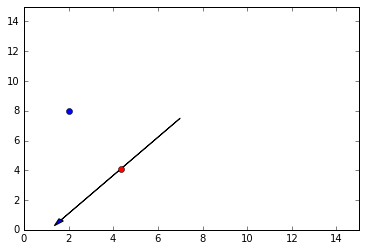

In [41]:
# Here is a object oriented class implementation of the Simple Centroid method
# which should probably be avoided in most circumstances. 


class SimpleCentroid:
    def __init__(self, class1_data, class2_data):
        class1_x, class1_y  = class1_data[0], class1_data[1]
        class2_x, class2_y  = class2_data[0], class2_data[1]
        self.class1_avg = np.mean(class1_x), np.mean(class1_y)
        self.class2_avg = np.mean(class2_x), np.mean(class2_y)
        self.midpoint = (np.array(self.class1_avg) + np.array(self.class2_avg)) / 2
        return
    
    def decision_fn(self, data_pt):
        normal_vector = np.array(self.class1_avg) - np.array(self.class2_avg)
        signed_value = np.dot(normal_vector.T, data_pt) - np.dot(normal_vector.T, self.midpoint)
        return signed_value
    
    def visualize(self, data_pt=None):
        plt.arrow(self.class2_avg[0], self.class2_avg[1], self.class1_avg[0] - self.class2_avg[0], self.class1_avg[1] - self.class2_avg[1], head_width=0.25, head_length=0.5)
        plt.plot(data_pt[0], data_pt[1], 'bo')
        plt.plot(self.midpoint[0], self.midpoint[1], 'ro')
        plt.axis([0, 15, 0, 15])
        plt.show()
        return
    

failed_data = [hours_read_failed, hours_practiced_failed]
passed_data = [hours_read_passed, hours_practiced_passed]
centroid = SimpleCentroid(failed_data, passed_data)
centroid.decision_fn(np.array([2, 8]))
centroid.visualize(np.array([2, 8]))

Note that if we were trying to predict how well a student would do on an exam, this would change from a classification to a regression problem. I will try to write about regression in a later topic. 

* Read more about the [centroid method] (https://people.eecs.berkeley.edu/~jrs/189/lec/02.pdf) (bottom of pg 10) from Berkeley's [Machine Learning course](https://people.eecs.berkeley.edu/~jrs/189/). 